In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 14

acc_df = pd.read_csv('./animalcrossing/accessories.csv')

Index(['Black', 'Green', 'Pink', 'Red', 'Yellow', 'White', 'Purple', 'Blue',
       'Brown', 'lightblue', 'Orange', 'Gray', 'hotpink', 'Beige'],
      dtype='object')


<BarContainer object of 14 artists>

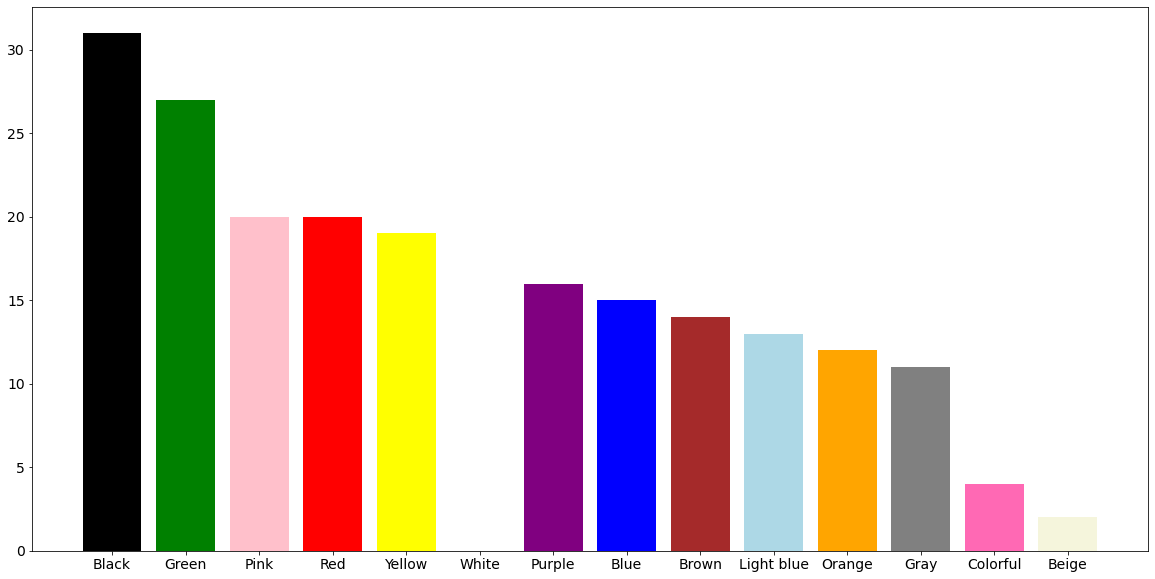

In [32]:
number_of_colors = acc_df["Color 1"].value_counts()

color_replace = {
    "Light blue": "lightblue",
    "Colorful": "hotpink"
}

colors = number_of_colors.rename(color_replace).keys()
color_names = number_of_colors.keys()

print(colors)
plt.bar(color_names, number_of_colors, color=colors)

In [33]:
colors_df = acc_df[["Color 1", "Color 2"]]


Color 1
0          14
dtype: int64


TypeError: 'value' must be an instance of str or bytes, not a tuple

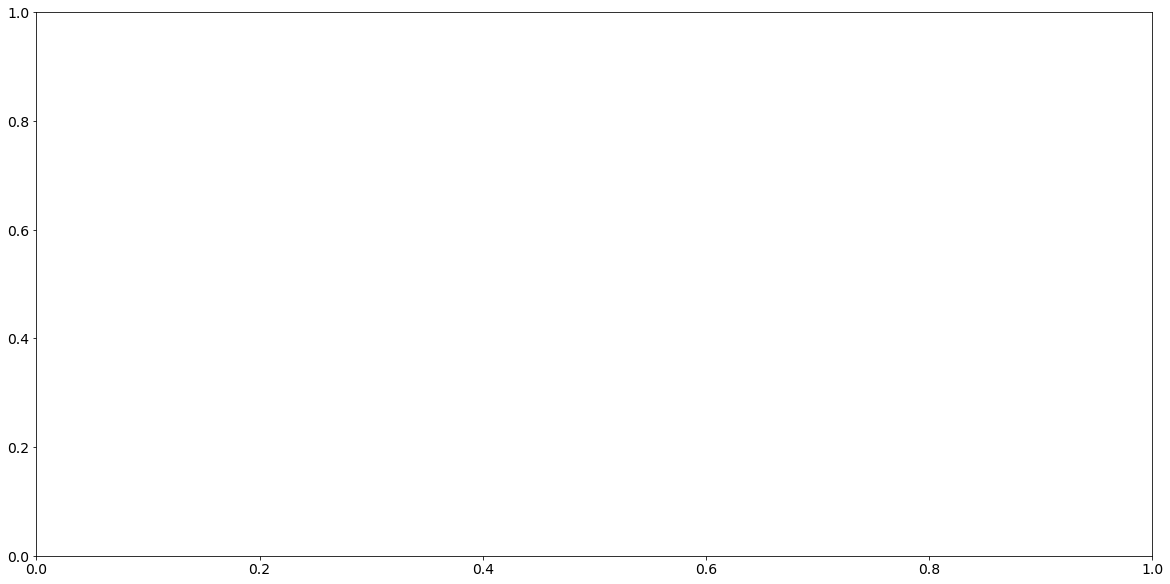

In [141]:
colors2 = acc_df["Color 2"].unique()
data = {}
for col in colors2:
    data[col] = 0
arr_of_cols = pd.DataFrame.from_dict(data, orient='index', columns=["Color 1"])
print(arr_of_cols.value_counts())

for col in colors2:
    number_of_colors = colors_df[colors_df["Color 2"] == col].value_counts()
    number_of_colors += arr_of_cols.value_counts()
    color_replace = {
        "Light blue": "lightblue",
        "Colorful": "hotpink",
        "Beige": "Moccasin"
    }

    colors = number_of_colors.rename(color_replace).keys()
    color_names = number_of_colors.keys()
    color = col
    if color in color_replace:
        color = color_replace[color]
    plt.bar(color_names, number_of_colors, bottom=arr_of_cols ,color=[color], label=col)
    arr_of_cols += number_of_colors

plt.xlabel("Color 1")
plt.ylabel("Number of accessories")
plt.title("Ammount of Accessories with Color 1 and Color 2")
plt.legend()
ax = plt.gca()
ax.set_facecolor("LightSalmon")
plt.show()

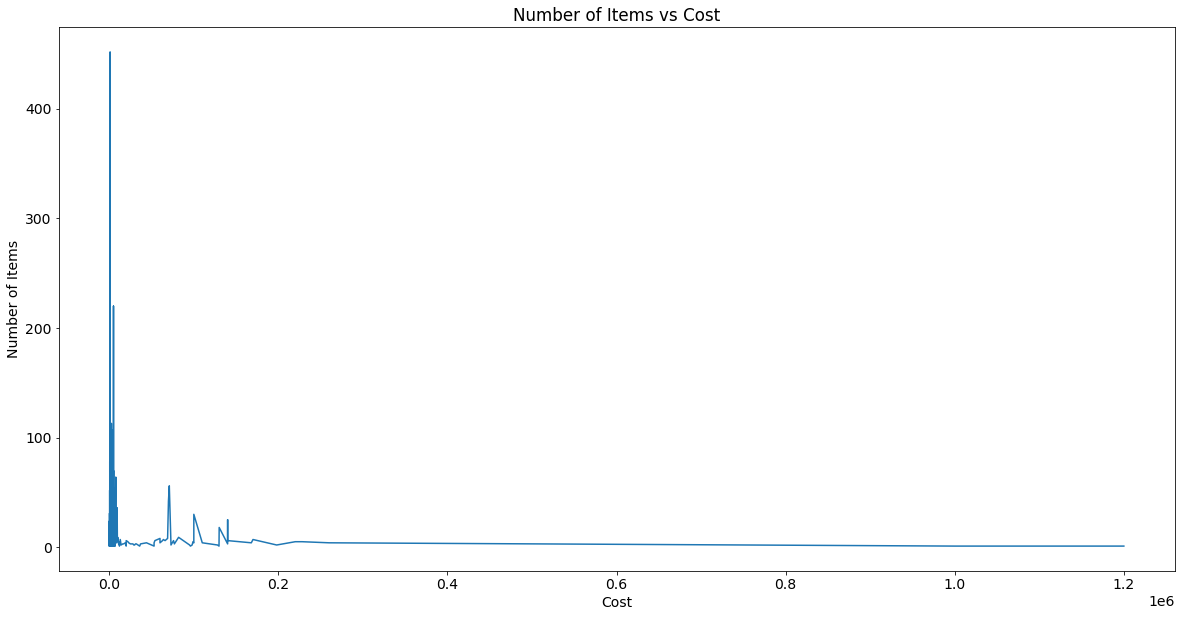

In [190]:
from pathlib import Path

pathlist = Path("./animalcrossing").glob('*.csv')
df_tot = pd.DataFrame()

for file in pathlist:
    df = pd.read_csv(file)

    if "Buy" in df.columns:
        y = df["Buy"].dropna()
        y = y[y != "NFS"].astype(int)
        x = y.value_counts().rename_axis("cost").reset_index(name="counts")
        df_tot = pd.concat([df_tot, x])
        #plt.bar(x.keys(), x)
        
df_tot = df_tot.sort_values("cost")
plt.plot(df_tot["cost"], df_tot["counts"])
plt.title("Number of Items vs Cost")
plt.ylabel("Number of Items")
plt.xlabel("Cost")
plt.show()

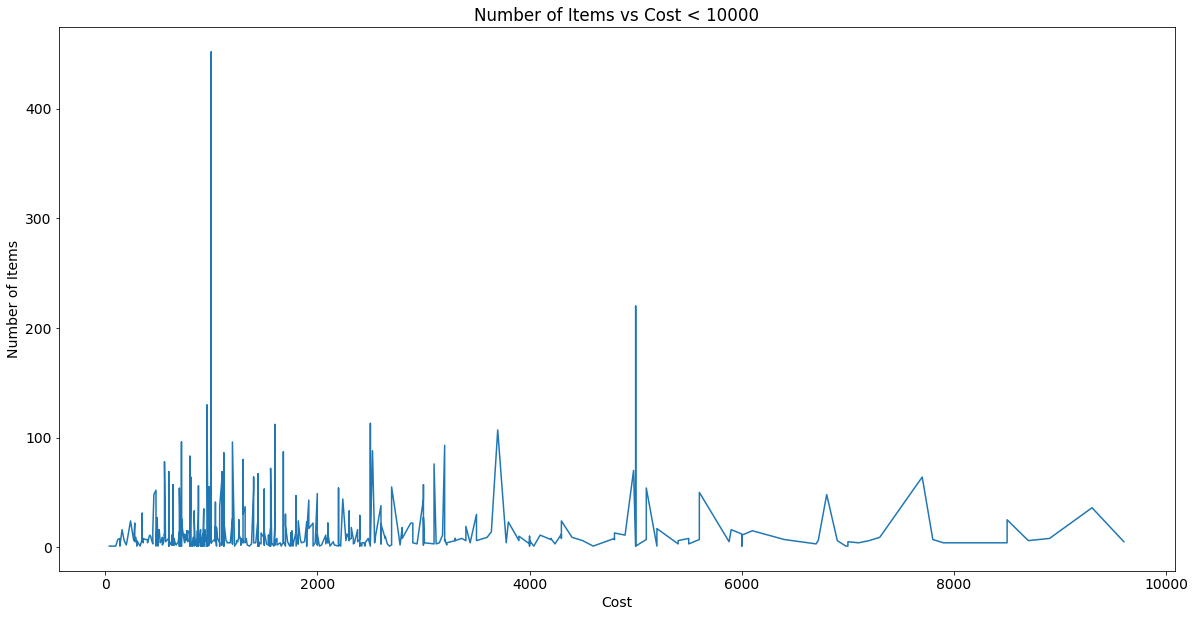

In [196]:
df_update = df_tot[df_tot["cost"] < 10000]
plt.plot(df_update["cost"], df_update["counts"])
plt.title("Number of Items vs Cost < 10000")
plt.ylabel("Number of Items")
plt.xlabel("Cost")
plt.show()

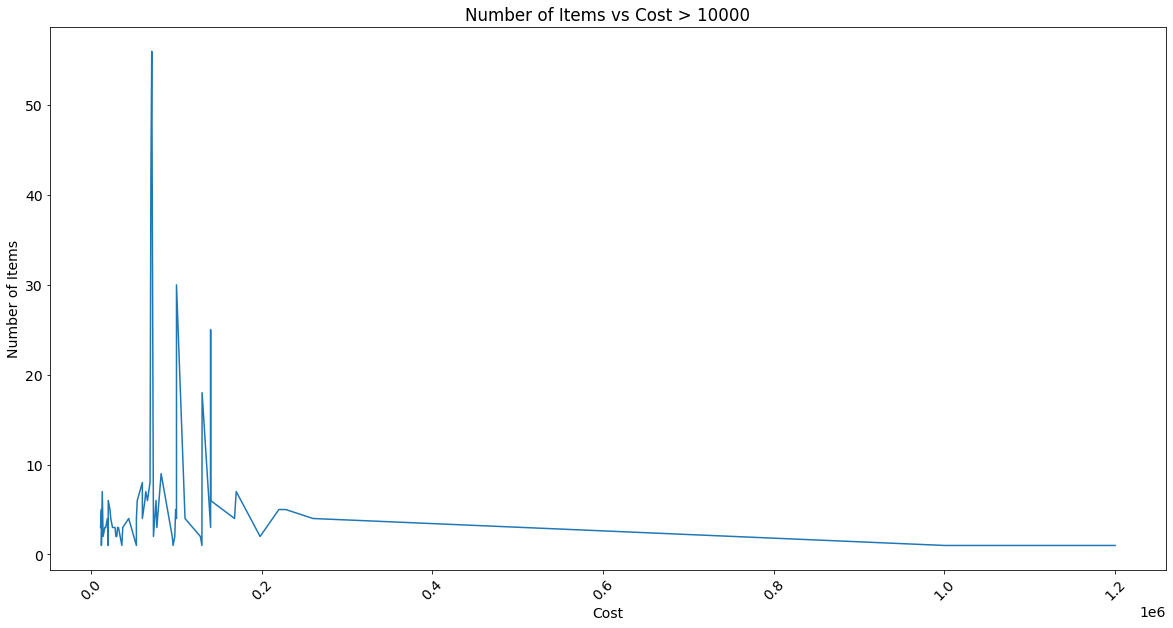

In [204]:
df_update = df_tot[df_tot["cost"] > 10000]
plt.plot(df_update["cost"], df_update["counts"])
plt.title("Number of Items vs Cost > 10000")
plt.ylabel("Number of Items")
plt.xlabel("Cost")
plt.xticks(rotation=45)
plt.show()

In [268]:
pathlist = Path("./animalcrossing").glob('*.csv')
df_tot = pd.DataFrame()

for file in pathlist:
    df_name = file.name.split(".")[-2]
    df = pd.read_csv(file)

    if "Buy" in df.columns:
        x = df[df["Buy"] != "NFS"]
        x = x.dropna(subset=["Buy"])
        x.insert(0, "File", [df_name] * len(x), True)
        df_tot = pd.concat([df_tot, x])

df_tot = df_tot[["File", "Name","Buy","DIY", "Color 1", "Color 2", "Size", "Catalog", "Source"]]
df_tot.head(10)

File             Name    Buy DIY     Color 1     Color 2 Size  \
0  wall-mounted  air conditioner  63000  No       White       White  2x1   
1  wall-mounted  air conditioner  63000  No        Gray        Gray  2x1   
2  wall-mounted  air conditioner  63000  No       Black       Black  2x1   
3  wall-mounted  air conditioner  63000  No        Pink        Pink  2x1   
4  wall-mounted  air conditioner  63000  No  Light blue  Light blue  2x1   
5  wall-mounted  air conditioner  63000  No       Brown       Brown  2x1   
6  wall-mounted    antique phone  16000  No       Brown      Yellow  1x1   
7  wall-mounted    antique phone  16000  No       Beige      Yellow  1x1   
8  wall-mounted    antique phone  16000  No       Black      Yellow  1x1   
9  wall-mounted  autograph cards   1400  No       White       White  2x1   

    Catalog         Source  
0  For sale  Nook's Cranny  
1  For sale  Nook's Cranny  
2  For sale  Nook's Cranny  
3  For sale  Nook's Cranny  
4  For sale  Nook's Cranny  
5  For sale  Nook's Cranny  
6  For sale  Nook's Cranny  
7  For sale  Nook's Cranny  
8  For sale  Nook's Cranny  
9  For sale  Nook's Cranny

In [267]:
df_tot[df_tot["Catalog"] == "Not for sale"].head(20)

File                       Name   Buy DIY Color 1     Color 2  \
44     wall-mounted                 bug plaque  1200  No  Yellow       Brown   
137    wall-mounted                fish plaque  1200  No  Yellow       Brown   
159    wall-mounted              fossil plaque  1200  No  Yellow       Brown   
340    wall-mounted           spider doorplate   360  No   Black       Green   
341    wall-mounted           spider doorplate   360  No  Yellow      Purple   
342    wall-mounted           spider doorplate   360  No   Green         Red   
343    wall-mounted           spider doorplate   360  No    Pink  Light blue   
344    wall-mounted           spider doorplate   360  No  Purple       Green   
345    wall-mounted           spider doorplate   360  No     Red        Blue   
346    wall-mounted           spider doorplate   360  No    Gray      Purple   
347    wall-mounted           spider doorplate   360  No    Blue         Red   
439    wall-mounted         wedding decoration  1000  No    Pink       Green   
440    wall-mounted         wedding decoration  1000  No   White       Green   
441    wall-mounted         wedding decoration  1000  No  Yellow       Green   
987   miscellaneous  Reese & Cyrus photo plate   400  No    Pink  Light blue   
1272  miscellaneous               wedding cake  4000  No    Pink       White   
1273  miscellaneous               wedding cake  4000  No   White      Yellow   
1274  miscellaneous               wedding cake  4000  No   Brown       Green   
1275  miscellaneous         wedding candle set  1200  No    Pink       White   
1276  miscellaneous         wedding candle set  1200  No   Beige      Yellow   

     Size       Catalog                    Source  
44    1x1  Not for sale  International Museum Day  
137   1x1  Not for sale  International Museum Day  
159   1x1  Not for sale  International Museum Day  
340   1x1  Not for sale                   Bug-Off  
341   1x1  Not for sale                   Bug-Off  
342   1x1  Not for sale                   Bug-Off  
343   1x1  Not for sale                   Bug-Off  
344   1x1  Not for sale                   Bug-Off  
345   1x1  Not for sale                   Bug-Off  
346   1x1  Not for sale                   Bug-Off  
347   1x1  Not for sale                   Bug-Off  
439   1x2  Not for sale            Wedding Season  
440   1x2  Not for sale            Wedding Season  
441   1x2  Not for sale            Wedding Season  
987   1x1  Not for sale            Wedding Season  
1272  1x1  Not for sale            Wedding Season  
1273  1x1  Not for sale            Wedding Season  
1274  1x1  Not for sale            Wedding Season  
1275  1x1  Not for sale            Wedding Season  
1276  1x1  Not for sale            Wedding Season

In [295]:
df_tot = df_tot.dropna()
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7495 entries, 0 to 453
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   File     7495 non-null   object
 1   Name     7495 non-null   object
 2   Buy      7495 non-null   object
 3   DIY      7495 non-null   object
 4   Color 1  7495 non-null   object
 5   Color 2  7495 non-null   object
 6   Size     7495 non-null   object
 7   Catalog  7495 non-null   object
 8   Source   7495 non-null   object
dtypes: object(9)
memory usage: 585.5+ KB


In [290]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

fetures = ["File","DIY", "Color 1", "Color 2", "Size", "Catalog", "Source"]
y = np.array(df_tot["Buy"])
X = df_tot[fetures]

encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value', 
    unknown_value=-1).fit(X)

X = encoder.transform(X)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=512)

In [292]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))

0.43457478589922327


In [293]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.14551333872271624


[Text(0.557645772352315, 0.9722222222222222, 'X[6] <= 9.5\nentropy = 6.733\nsamples = 5021\nvalue = [75, 7, 23, 79, 28, 3, 34, 164, 1, 4, 118, 5, 2\n4, 180, 3, 1, 3, 5, 31, 11, 195, 6, 8, 29, 6\n5, 143, 2, 19, 65, 10, 13, 140, 6, 11, 7, 88\n3, 147, 2, 4, 3, 86, 44, 2, 5, 10, 14, 5, 101\n31, 4, 40, 1, 46, 11, 83, 6, 2, 10, 6, 59, 1\n43, 1, 4, 1, 30, 4, 8, 34, 3, 12, 9, 14, 36\n2, 5, 45, 1, 58, 4, 8, 50, 2, 16, 2, 6, 31\n10, 18, 2, 15, 4, 20, 1, 2, 6, 26, 2, 55, 2\n2, 4, 10, 22, 2, 4, 12, 7, 4, 17, 1, 35, 34\n9, 7, 8, 76, 2, 2, 5, 16, 10, 3, 14, 8, 9, 3\n7, 40, 6, 5, 4, 10, 5, 32, 1, 34, 19, 40, 8\n22, 31, 14, 36, 3, 10, 5, 4, 9, 6, 2, 2, 7\n132, 36, 5, 5, 9, 52, 11, 9, 10, 2, 32, 7, 55\n3, 6, 15, 3, 6, 2, 3, 4, 34, 2, 2, 3, 81, 4\n29, 3, 33, 89, 2, 11, 6, 2, 9, 4, 5, 35, 45\n3, 16, 5, 2, 85, 37, 3, 6, 5, 69, 4, 19, 15\n5, 99, 4, 4, 9, 24, 18, 23, 24, 12, 5, 1, 92\n4, 1, 69, 8, 4]'),
 Text(0.31549023541444915, 0.9166666666666666, 'X[0] <= 8.5\nentropy = 5.998\nsamples = 2917\nvalue = [15

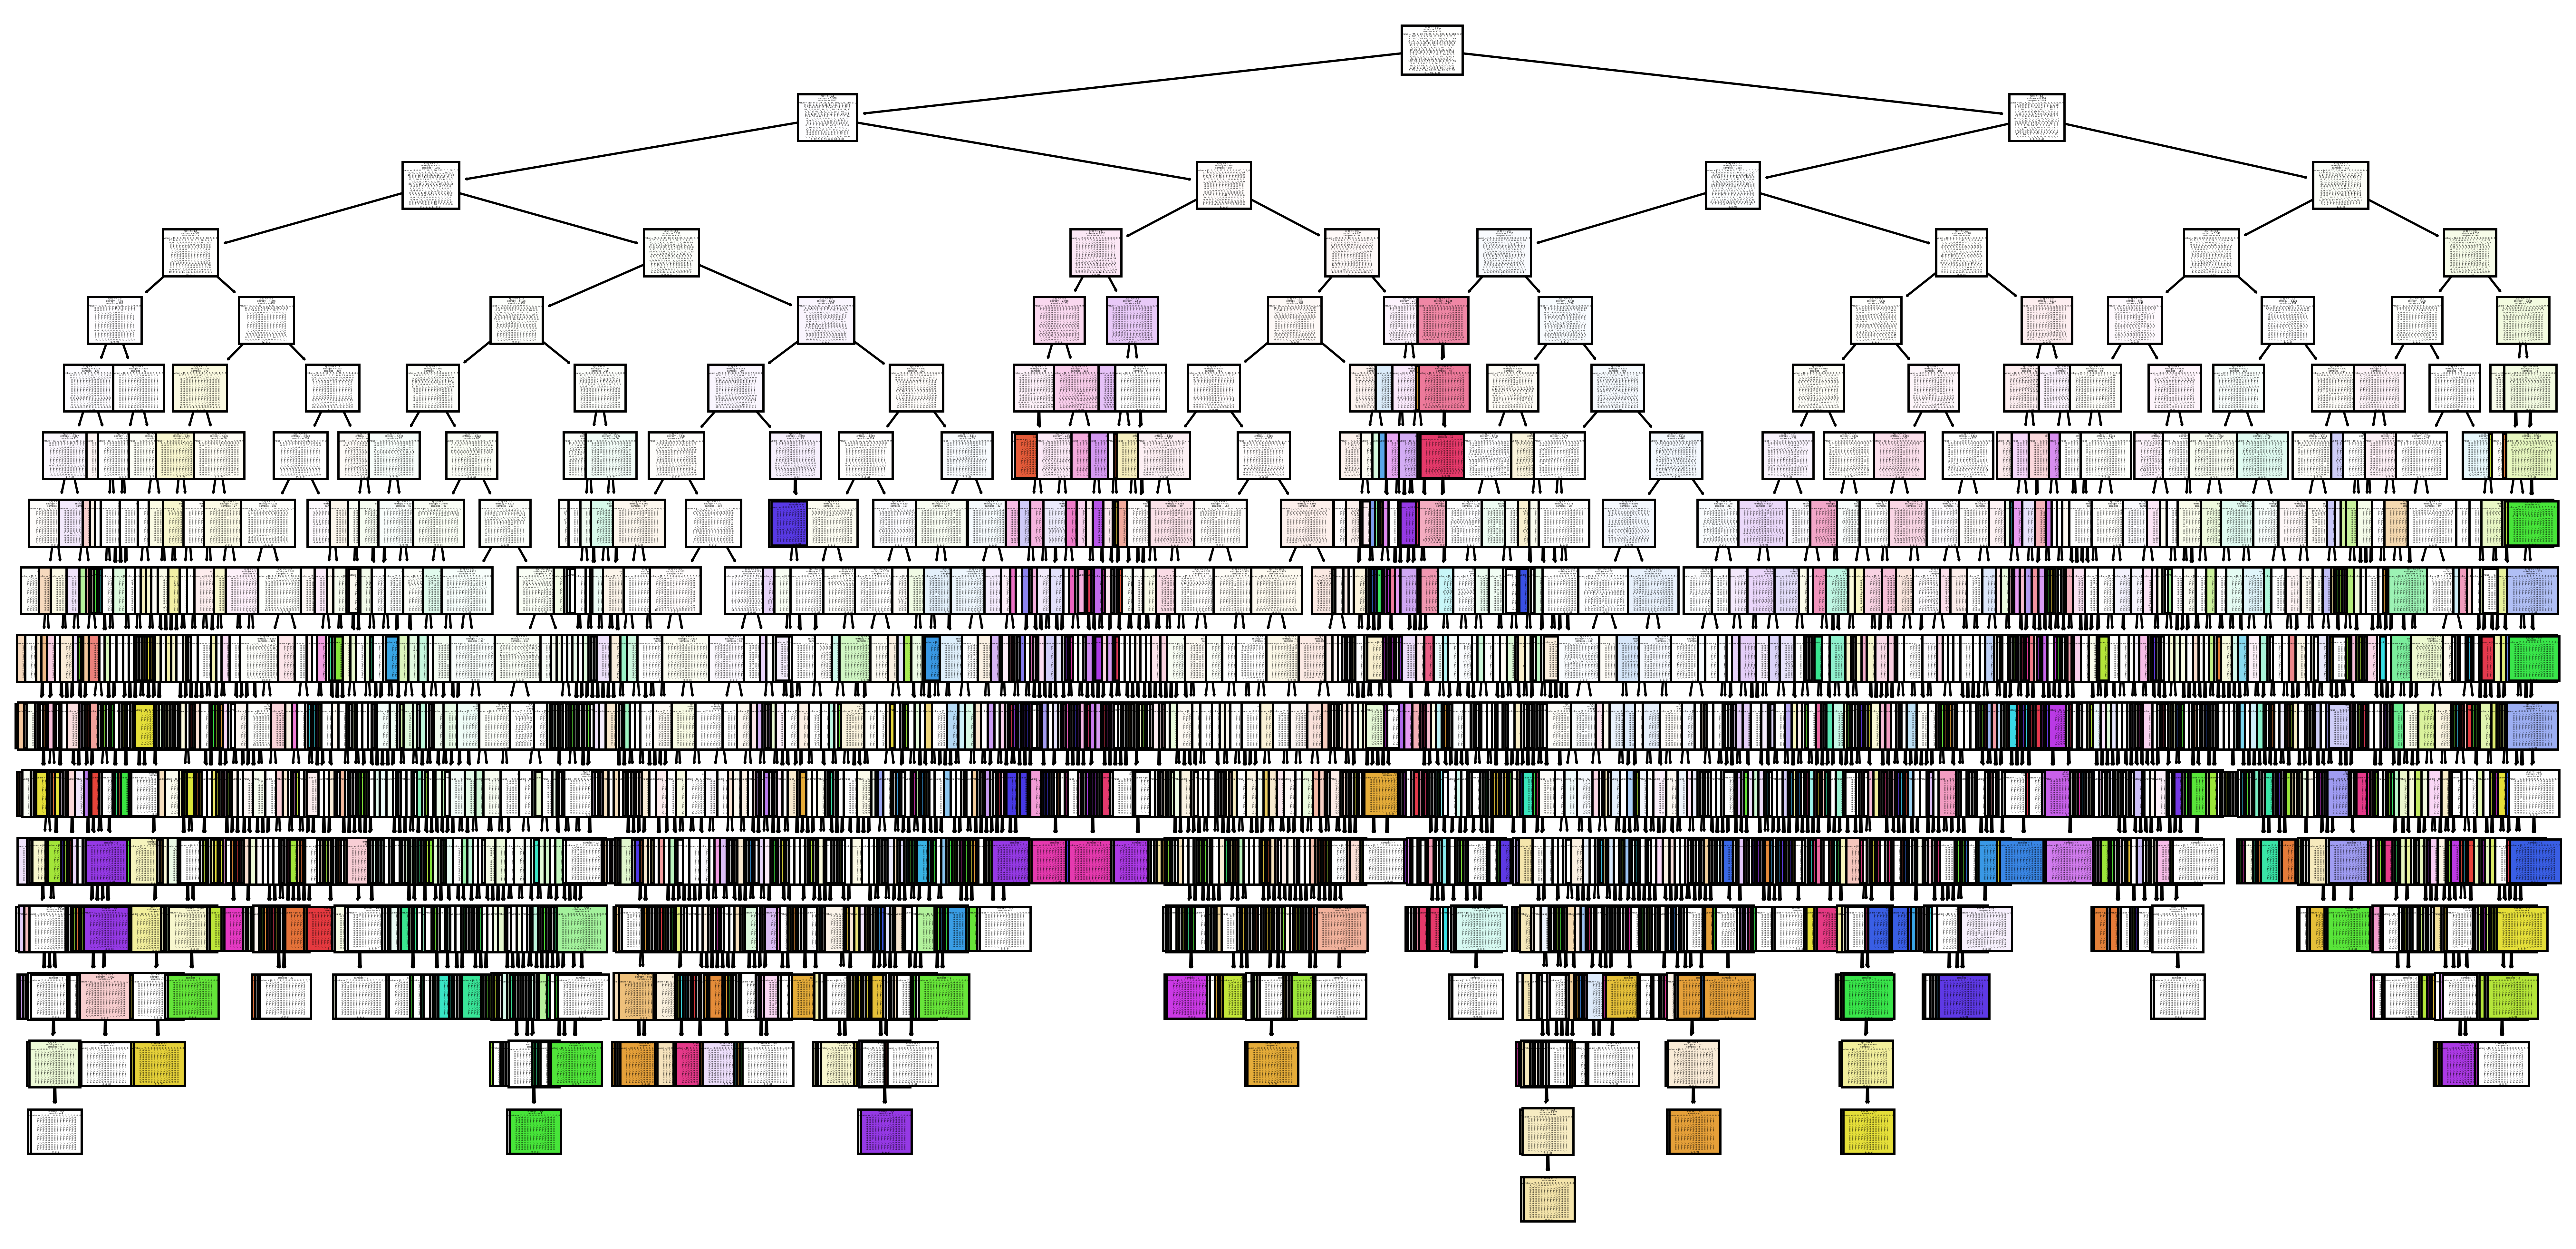

In [294]:
plt.figure(dpi=500)
tree.plot_tree(clf, filled=True)